_________________
# 04. SciPy & Scikit-Learn
_________________
In this lab we will see how easy it is to use common algorithms and functions in the Python packages for scientific computing (SciPy) and machine learning (scikit-learn). First we will explore some of the [SciPy](https://docs.scipy.org/doc/scipy/reference/) functionality and visualize the results using Matplotlib. Then, at the end of this lab we will introduce a package based on SciPy, that offers a large amount of common machine learning algorithms - [scikit-learn](http://scikit-learn.org/stable/).

# [SciPy](https://docs.scipy.org/doc/scipy/reference/)
SciPy encompasses a number of packages for mathematics, science, and engineering. If you used Matlab before, SciPy is like the toolboxes for scientific computation for Matlab. Scipy gives us many useful functions for computations and is widely used along with other modules, such as scikit-learn. 
_________
    In general, it is useful to check if your algorithm is already implemented in SciPy or another widely used library, as the code is well maintained, relatively fast, diligently tested, and has been applied numerous times by researches all over the world. Even in cases where you need to implement your own algorithm it is good to use an implementation of one of the common packages as a reference, or a first baseline.
_______________
## SciPy Modules

- [SciPy.Cluster](https://docs.scipy.org/doc/scipy/reference/cluster.html#module-scipy.cluster): Clustering algorithms group data such that similar data is grouped together.
- [SciPy.IO](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io): Data input and output: Mostly useful for loading Matlab `.mat` files, but also sound files and some others.
- [SciPy.Stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats): Very large number of common probability distributions and statistical functions.
- [SciPy.Optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) Optimization routines, root finding, curve fitting - all are very important for basically any computational task.
- [SciPy.NDImage](https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage): Image processing.
______________

Before we get started, let's import NumPy and Matplotlib and set the plotting options for our notebook to plot *inside* of our Jupyter notebook (the `%matplotlib inline` magic is only used in IPython/Jupyter notebooks). 

In [2]:
#IPython magic to plot inside the Jupyter notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

# Scipy Example: Image processing

Let's see another plotting command `imshow()` and some of the basic image processing functions provided by SciPy.
First we import the `ndimage` sub-package and the image that we will use for our examples:

In [3]:
from scipy import ndimage
from scipy.misc import face #Get a 1024 x 768, color image of a raccoon face.

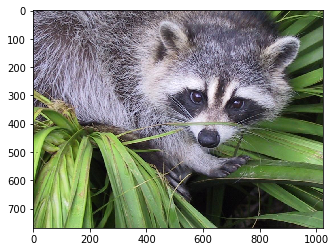

In [4]:
face = face()
plt.imshow(face);

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>What is the data type of the image?</li>
<li>What is the shape of the image?</li>
<li>What does the 3rd dimension correspond to?</li>
<li>Can you plot the red, green and blue contributions separately? Hint: Copy the image and set the 3rd dimension values successively to 0, check the resulting image.</li>
</ol>
</div>


In [5]:
print(face.dtype)
print(face.shape)
print(face.ndim)
print(face.size)

uint8
(768, 1024, 3)
3
2359296


In [6]:
# 1. The data type is numpy nd array of uint8's.
print(face.dtype)

uint8


In [7]:
# 2. Rectangle (1024 x 768 x 3).
print(face.shape)

(768, 1024, 3)


In [8]:
# 3. The third dimension would be color value (R,G,B).
print(face.ndim)

3


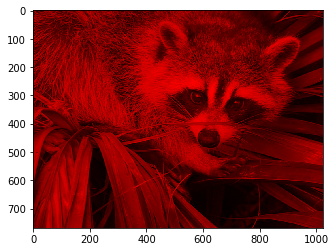

In [9]:
# 4. Plot the red, green and blue contributions separately
I_red = face.copy()  # Duplicate image
I_red[:, :, 1] = 0    # Zero out contribution from green
I_red[:, :, 2] = 0    # Zero out contribution from blue
plt.imshow(I_red)

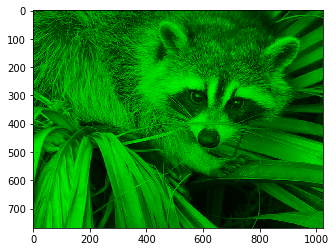

In [10]:
I_green = face.copy()  # Duplicate image
I_green[:, :, 2] = 0    # Zero out contribution from green
I_green[:, :, 0] = 0    # Zero out contribution from blue
plt.imshow(I_green)

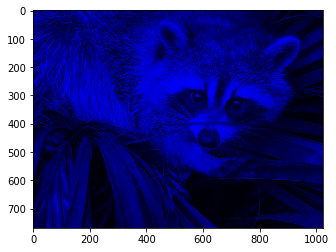

In [11]:
I_blue = face.copy()  
I_blue[:, :, 0] = 0   
I_blue[:, :, 1] = 0   
plt.imshow(I_blue)

Since the underlying image is simply an array we can do any kind of NumPy operation on it. For example we can slice the array:

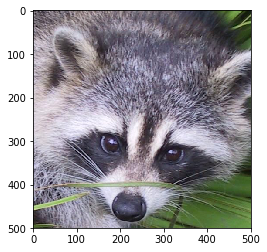

In [12]:
plt.imshow(face[0:500, 400:900])

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>Can you remove the axis of the image? Hint: Set the axis to "off".</li>
<li>What are the maximum and minimum values in each dimension of the image? What do they correspond to?</li>
</ol>
</div>


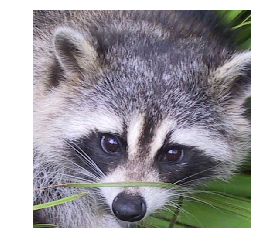

In [13]:
# 1. Removing axis
plt.axis('off')
plt.imshow(face[0:500, 400:900])
# 2. Pixel indexes and RGB values.

SciPy gives us a large number of image manipulation functions. We can for example apply filters, geometric transformations and many more...

In [14]:
gaussianFilter = ndimage.gaussian_filter(face, 15)
rot_face = ndimage.rotate(face, 45)

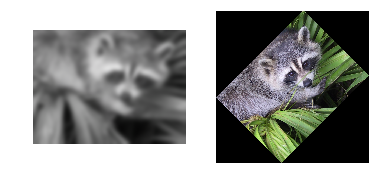

In [15]:
plt.subplot(1,2,1);
plt.imshow(gaussianFilter);
plt.axis("off");
plt.subplot(1,2,2);
plt.imshow(rot_face);
plt.axis("off");

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>Make sure that you understand what `plt.subplot()` does.</li>
<li>What does (1,2,1)  and (1,2,2) correspond to?</li>
<li>Create a figure with 4 subplots: 2 rows and 2 columns. Perform a different operation on the picture on each of the subplots.</li>
</ol>
</div>

In [16]:
# The subplot() command specifies numrows, numcols, fignum where fignum 
# ranges from 1 to numrows*numcols. The commas in the subplot command are optional 
# if numrows*numcols<10. So subplot(211) is identical to subplot(2, 1, 1).

# These are subplot grid parameters encoded as a single integer. 
# For example, "111" (or 1,1,1) means "1x1 grid, first subplot".
# and "234" means "2x3 grid, 4th subplot".

Scikit-learn (and other specialized packages) provide loads of advanced image manipulation functions, like edge detection, segmentation or other transformations. If you are interested in image manipulations have a look at the [scikit-learn Gallery](http://scikit-image.org/docs/dev/auto_examples/). From a CogSci/Neuroscience perspective the example on [Simple cells in Vision](http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_gabors_from_astronaut.html#sphx-glr-auto-examples-features-detection-plot-gabors-from-astronaut-py) could be interesting!

# SciPy Example: Optimization

One of the most common tasks in computation is *optimization*. In optimization we try to find parameter values for our model that minimize or maximize some function of the model. SciPy provides a large number of optimization routines for finding function minima, fitting curves or finding roots.

Let's import the optimization package to get access to the optimization routines:

In [17]:
from scipy import optimize

For 
$ f_3(x) = x^{2} + 10 * sin(x)$ and $x = np.arange(-10,10, 0.1)$



<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>Implement the function `f3`.</li>
<li>Plot the function `f3` for x.</li>
<li>Inspect the plot visually (name [local and global minima](https://en.wikipedia.org/wiki/Maxima_and_minima)).</li>
</ol>
</div>

In the lecture you learned how [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) can learn the weights in a neuronal network. Gradient descent is not specific to neuronal networks, but is a common optimization approach that can always be applied if we can caculate gradients over our data. Let's see how one of the most common gradient descent algorithms ([BFGS-algorithm](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)) finds the minima of our function in SciPy.

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>Calculate the minima for `f3` using BFGS optimization. Use `optimize.fmin_bfgs`. You do not have to specify any of the optional parameters for this exercise!</li>
<li>What is the minimal value?</li>
<li>How many iterations did the algorithm require?</li>
<li>What does the second argument in `optimize.fmin_bfgs` do?</li>
<li>Try the optimization with an initial guess of 3 - What is the result? Why do you think did the algorithm return that result?</li>
</ol>
</div>

Optimization is a very important field for any computational discipline and you will probably encounter it throughout your studies and many computational tasks.

### Curve fitting

In some cases we will know (or impose) the parametric form of our data, i.e. we know what *kind of function* generated the data, but do not know what the parameters of that function are.

Let's say we know that data was generated by a function of the form:
$$f(x) = a * x^{2} + b * sin(x)$$

Assume we have 200 datapoints between $(-10, 10)$, generated by this function with parameters $a = 0.5, b = 1.0$ and some additive noise, i.e.:
$data_{y} = f(x) + noise $



In [20]:
def f4(x, a,b):
    return a* x**2 + b *np.sin(x)

x_data = np.linspace(-10,10, 200)
y_data = f4(x_data, 0.5, 1.0) + np.random.randn(200)

Given our initial guess for the parameters we can estimate the parameters $a,b$ using `optimize.curve_fit()`.

In [21]:
guess = [0,0]
parameters, parameter_variance = optimize.curve_fit(f4, x_data, y_data, guess)

In [22]:
print("The parameter value for a is: {0}, the parameter value for b is {1}".format(parameters[0],parameters[1]) )

The parameter value for a is: 0.49891198122529584, the parameter value for b is 0.890304115671581


<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li> What does `parameter_variance` tell us about our fit?</li>
<li> Now generate the data for $a =0.2, b=0.5$. Plot the data, as well as the function resulting from the curve fit.</li>
</ol>
</div>

These were only a few examples of the large number of functions and methods provided by SciPy. If you are interested and solving computational problems using Python, we recommend you have a look at the examples and tutorials provided (some good starting points can be found in the References section).

_________________________
# Scikit-Learn
_________________________

Scikit-learn is a machine learning library build upon NumPy and SciPy. It provides many of the commonly used machine learning algorithms and datasets. It is a great library to explore algorithms, as it is very well documented and large numbers of examples exists.

Scikit-learn is used in the first exercise for this course and the relevant functions for this exercises will be provided in the exercise sheet. Here we will only have a quick look at how we can define, train and use a model in scikit-learn. As an example model we will look at linear regression.

Right now scikit-learn should not be installed on your anaconda virtual environment. We can install it using ``conda install scikit-learn`` in a terminal with your virtual environment activated. 

You can also try to use an IPython magic command and install directly from this notebook:

In [32]:
!conda install scikit-learn --yes #--yes supresses the installation yes/no prompt

Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /home/on/miniconda3/envs/cogsci:
#
scikit-learn              0.18.1              np111py35_1  


After installing you should be able to import the datasets from scikit-learn by:

In [33]:
from sklearn import datasets

Before we can start we will need data so that we can analyze it. Scikit-learn already comes with a set of common datasets and functionality to generate synthetic dataset. These datasets and functions are a convenient way to benchmark your algorithms and explore and learn strengths and weaknesses of common learning algorithms.

Since we will look at regression, we will use the classic dataset for regression: the Boston house-price datasets. In this dataset we get a number of numeric features (values that we will use to predict another quantity, in this case the house price). We want to train a model to learn a relationship between these features and the target value (house price). 

Before we have a look at that dataset, let's see a *simpler case with only one feature*. As discussed, we can generate *synthetic data* using:

In [34]:
X, y = datasets.make_regression(n_samples=250, n_features=1, noise=5.5)

<div class="alert alert-info" role="alert">
Before applying some model to data, it is always a good idea to plot the data and have a look at some data characteristics.

<h1>Exercises</h1>
<ol>
<li> Plot the data $X,y$ as a scatterplot.</li>
</ol>
</div>

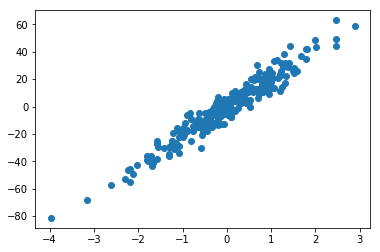

In [35]:
plt.scatter(X, y)

Interacting with scikit-learn always follows the same 3 steps:

1. First we define a model.
2. Then we learn/fit the model parameters.
3. Finally we can use the model (predict new values or inspect the learned parameters, etc.).

Let's see how this goes for our linear regression. Here we will use the most simple linear regression [Ordinary Least Squares Regression (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares).

In OLS we assume a linear model of the form:

$$ y = w_{0} + w_{1} * x_{1} + \dots + w_{n} * x_{n} $$ where $w_0$ is the *intercept* and $w_{1-n}$ are called *coefficients* (or weights).


The $x_{1-n}$ are the individual features in $X$, $y$ is the value we want to predict with our data.

We can define this model in scikit-learn like this:

In [36]:
from sklearn import linear_model
import sklearn

In [37]:
olsModel = linear_model.LinearRegression()

### Learning the coefficients

In the second step, we learn the coefficients of our model ($w_i$) from our data. *How* we learn the parameters differs from model to model - for standard OLS we learn the coefficients by *minimizing* the sum of squares *between the true y and the prediction of our model*.

In scikit-learn we learn the parameters of the defined models by calling `.train()` and specifying the training data $X$, containing all observed values and $y$ the value to be predicted.

In [38]:
olsModel.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

That's it! You might be surprised by not getting an output result - thats because all models in scikit-learn store the learned parameters inside the model object. We can access the learned coefficient(s) using:

In [39]:
olsModel.coef_

array([ 21.20979699])

<div class="alert alert-info" role="alert">
<h1>Exercises</h1>
<ol>
<li>Use the OLS model to predict the values for `x_test`. Use `olsModel.predict()`</li>
<li>What does the `[:,None]` do and why is it necessary? Hint1: This is equivalent to `[:, np.newaxis]`. Hint2: Remember linear algebra and notice that `X` is captitalized while `y` is not!</li>
<li>Plot both the true data and your prediction.</li>
</ol>
</div>

## Boston Houseprices

To finish this lab, let's apply the OLS model to a real dataset. First let's import the data directly from scikit-learn.



In [327]:
houseprices = sklearn.datasets.load_boston()

The data in `sklearn.datasets` is already nicely formatted (in most real datasets you will spend considerable time cleaning the data or fixing recording problems). The datasets contain:

- A verbal description of the dataset.
- The feature names.
- The data ($X$)
- The target ($y$)

Let's start by having a look at the data description:

In [328]:
print(houseprices.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

This contains a lot of information - right now we only really care about the features (Attribute Information). We can access these features by:

In [329]:
houseprices.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], 
      dtype='<U7')

Target contains the target values (in this case in thousands of dollars).


<div class="alert alert-info" role="alert">

<h1>Exercises</h1>
<ol>
<li>Check that the data contains all information included in the dataset description (Number of Instances: 506, Number of Attributes: 13).</li>
<li>What is the lowest price for a house? What is the highest? What is the mean? What is the SD?</li>
<li>Setup the OLS model and fit the data.</li>
<li>What are the coefficients for your model?</li>
<li>What do the coefficients mean? How would you predict a house price given this model?</li>
</ol>
</div>


We won't get into the details if this is a good model (it's not) and how we can assess how good it does and improve it - the main idea of this lab is to show how to define models, train on some data and use the learned parameters to predict new data.

# References:

Most examples in this lab are based on this [excellent course on SciPy, NumPy and Matplotlib](http://www.scipy-lectures.org/). 

Scikit-learn has great [tutorials](http://scikit-learn.org/stable/tutorial/index.html) and very good [documentation](http://scikit-learn.org/stable/user_guide.html). Check also their [algorithm cheatsheet](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

Scipy also has an excellent [Tutorial](https://docs.scipy.org/doc/scipy/reference/). 

Finally, there is loads of great video presentations and tutorials on scikit-learn, SciPy, NumPy and Matplotlib online (check for PyCon, SciPy Conference etc.).
